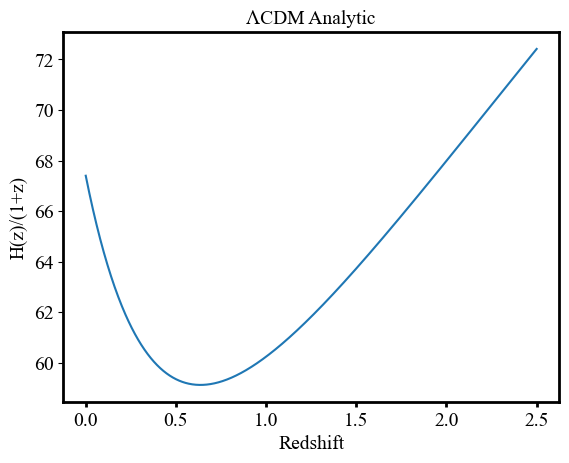

With No Mergers, Values at z = 0: 
Omega_m: 
0.3121973851075922
Omega_r: 
9.061444030764565e-05
Omega_Lambda: 
0.6877120004521003
Hubble Constant (km/(sec Mpc)): 
67.33669798854245
Total Energy Density: 
8.515055045326903e-27
 


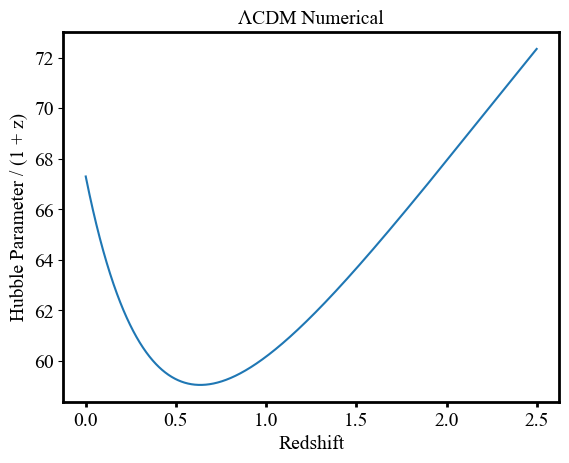

In [30]:
"""
Here we compute H(z) for Lambda-CDM numerically and analytically. We see there is an excellent match.
One could use more sophisticated methods for numerically integrating the differential equations, though
since the match to the analytic case is good, this complication is not necessary. 
"""

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

MetersPerParsec = 3.086*(10**(16))
MetersPerGpc = (10**9)*MetersPerParsec
MetersPerMpc = (10**6)*MetersPerParsec
SecondsperYear=365*24*60*60
SMBHBinaryMass=2*(10**7) #Solar Masses
KgperSolarMass = 1.989*(10**(30))
SMBHBinaryMass = SMBHBinaryMass*KgperSolarMass #now in kg 
c = 299792458 #m/s
G = 6.6743*(10**(-11)) # m^3 kg^−1 s^−2
Epsilon = 0.08 #Fraction of mass converted to gravitational waves 
H0UnitConversion = 1000/(MetersPerParsec*1000000)

h = 0.674
H0 = 100 * h           # km/s/Mpc
H0_SI = H0 * H0UnitConversion  # s^-1
rho_crit_0 = 3 * H0_SI**2 / (8 * np.pi * G)  # Critical density today, kg/m^3
Omega_r0 = 4.15e-5 / h**2  # Radiation density parameter (photons + neutrinos), from Dodelson 
Omega_m0 = 0.14241 / h**2 # Matter density parameter 
Omega_Lambda0 = 1 - Omega_m0 - Omega_r0 #Sets flatness 

#Analytic computation 
z_vals = np.linspace(0, 2.5, 1000)
Hz_vals = [H0 * np.sqrt(Omega_m0*(1+z)**3 + Omega_r0*(1+z)**4 + Omega_Lambda0) for z in z_vals]
Hz1pz = [H/(1+z) for H,z in zip(Hz_vals, z_vals)] #Dividing H(z) by 1+z for plotting. This has been done in the literature before. 

plt.plot(z_vals, Hz1pz)
plt.title('ΛCDM Analytic')
plt.xlabel("Redshift")
plt.ylabel("H(z)/(1+z)")
plt.show()

# Friedman Equation 
def H(z, rho_m, rho_r, rho_Lambda):
    rho_total = rho_m + rho_r + rho_Lambda
    return math.sqrt((8*math.pi*G/3)*(rho_total))

def RhoCritical(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return 3*Hval*Hval/(8*math.pi*G) 

#Returns drho_r / dz 
def drhordz(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return (-1/(Hval*(1+z)))*(-4*Hval*rho_r)

#Returns drho_m / dz 
def drhomdz(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return (1/(Hval*(1+z)))*(3*Hval*rho_m)

#Setting initial conditions (at z = 1090)
rho_Lambda = Omega_Lambda0*rho_crit_0 #physical energy density is constant for cosmological constant
rho_r = Omega_r0*rho_crit_0*(1+1090)**4
rho_m = Omega_m0*rho_crit_0*(1+1090)**3
z = 1090 #Redshift at CMB formation 
dz = -0.001
HList_No_Mergers=[]
zList_No_Mergers=[]
#Euler's method, using it bc it is simple 
while z>0:
    rho_r_old = rho_r
    rho_m_old = rho_m 
    rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda)
    rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda)
    HList_No_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
    zList_No_Mergers.append(z)
    z = z + dz
    
RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
Omega_m=rho_m/RhoCrit
Omega_r=rho_r/RhoCrit    
print("With No Mergers, Values at z = 0: ")
print("Omega_m: ")
print(Omega_m)
print("Omega_r: ")
print(Omega_r)
print("Omega_Lambda: ")
print(rho_Lambda/RhoCrit)
H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion
print("Hubble Constant (km/(sec Mpc)): ")
print(H0New)
print("Total Energy Density: ")
print(rho_r + rho_m + rho_Lambda)
print(" ")

H1pzList_No_Mergers=[]
for index in range(len(HList_No_Mergers)):
    H1pzList_No_Mergers.append(HList_No_Mergers[index]/(1+zList_No_Mergers[index]))
    
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1])
plt.title("ΛCDM Numerical")
plt.xlabel("Redshift")
plt.ylabel("Hubble Parameter / (1 + z)")
plt.show()

In [31]:
import numpy as np
#This is used to set initial conditions (densities at z = 1090).

def InitialConditions(h):
    # Constants
    c = 299792458          # m/s
    G = 6.67430e-11       # m^3 kg^-1 s^-2
    MetersPerMpc = 3.086e22  # meters per Mpc
    z_rec = 1090          # Redshift at recombination

    # Derived parameters
    H0 = 100 * h           # km/s/Mpc
    H0_SI = H0 * 1000 / MetersPerMpc  # s^-1
    rho_crit_0 = 3 * H0_SI**2 / (8 * np.pi * G)  # Critical density today, kg/m^3
    Omega_r = 4.15e-5 / h**2  # Radiation density parameter (photons + neutrinos), from Dodelson 
    Omega_m = 0.14241/h**2
    Omega_Lambda = 1.0 - Omega_m - Omega_r  # Dark energy density for flatness 

    # Density parameters at z=1090
    rho_m_initial = Omega_m * rho_crit_0 * (1 + z_rec)**3  # Total matter density
    rho_r_initial = Omega_r * rho_crit_0 * (1 + z_rec)**4  # Radiation density
    rho_Lambda_initial = Omega_Lambda * rho_crit_0  # Dark energy density, is constant with redshift 
    return rho_m_initial, rho_r_initial, rho_Lambda_initial

In [32]:
from matplotlib import font_manager


for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
    if 'Urbanist'.lower() in fontpath.lower():
        print(fontpath)

from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = "/home/hoelsczj/Library/static/"

# get normal font and store it in `urbanist-Light`
font_path = personal_path + "Urbanist-Regular.ttf"
font_manager.fontManager.addfont(font_path)
urbanist= FontProperties(fname=font_path)

# get bold font and store it in `urbanist_bold`
font_path = personal_path + "Urbanist-Bold.ttf"
font_manager.fontManager.addfont(font_path)
urbanist_bold = FontProperties(fname=font_path)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = urbanist.get_name()
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', family="urbanist", size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, lw=2)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rcParams['xtick.minor.width']=2   
plt.rcParams['xtick.major.width']=2 
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from pyfonts import load_google_font
from pypalettes import load_cmap
import pandas as pd
cmap = load_cmap("PurpleGreens")

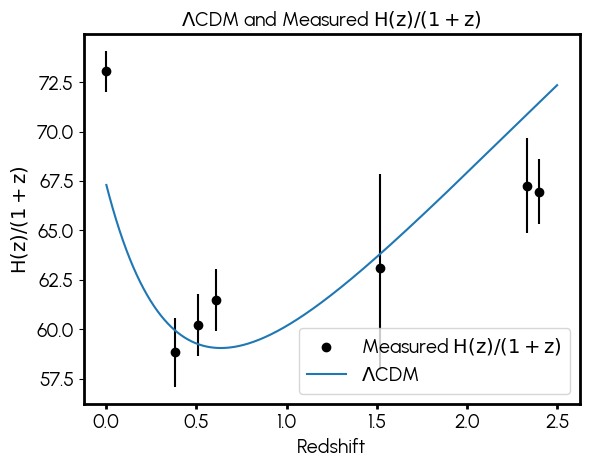

In [33]:
#Here we have measured values for H(z), with upper and lower error bars. 
H_Measured = np.array([73.04, 81.2, 90.9, 99, 159, 224, 227.6]) #Hubble parameter, km / (sec Mpc)
H_Measured_Uncertainty_Upper = np.array([1.04, 2.42, 2.37, 2.51, 12, 8, 5.74])
H_Measured_Uncertainty_Lower = np.array([1.04, 2.42, 2.37, 2.51, 13, 8, 5.47])
H_Measured_Redshift = np.array([0, 0.38, 0.51, 0.61, 1.52, 2.33, 2.4]) #Redshifts for the values of H

#This is so we can plot things as H(z) / (1+z) :
H_Measured_1pz = []
H_Measured_Uncertainty_Upper_1pz = []
H_Measured_Uncertainty_Lower_1pz = []
for index in range(len(H_Measured)):
    H_Measured_1pz.append(H_Measured[index]/(1+H_Measured_Redshift[index]))
    H_Measured_Uncertainty_Upper_1pz.append(H_Measured_Uncertainty_Upper[index]/(1+H_Measured_Redshift[index]))
    H_Measured_Uncertainty_Lower_1pz.append(H_Measured_Uncertainty_Lower[index]/(1+H_Measured_Redshift[index]))

H_Measured_1pz = np.array(H_Measured_1pz) #Divided by (1+z)
H_Measured_Uncertainty_Upper_1pz = np.array(H_Measured_Uncertainty_Upper_1pz)
H_Measured_Uncertainty_Lower_1pz = np.array(H_Measured_Uncertainty_Lower_1pz)

plt.scatter(H_Measured_Redshift, H_Measured_1pz, color='k', label=r'Measured $\rm{H}(z)/(1+z)$')
plt.vlines(x = H_Measured_Redshift, ymin = H_Measured_1pz - H_Measured_Uncertainty_Lower_1pz, ymax = H_Measured_1pz + H_Measured_Uncertainty_Upper_1pz, colors = 'black')
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1], label=r'$Λ$CDM')
plt.title(r'$\Lambda$CDM and Measured $\rm{H}(z)/(1+z)$')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{H}(z)/(1+z)$')
plt.legend()



Text(0.5, 0, 'Redshift')

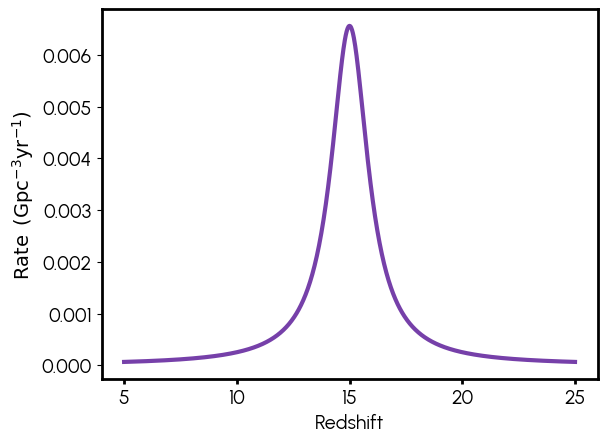

In [34]:
#This plots the comoving SMBH formation rate for a case that produces 10^6 SMBHs per cubic Gpc at z = 0 
def SMBH_formation_rate(z, C):
    z_peak = 15 #Redshift the formation peaks at 
    rate = C / (1 + (z - z_peak)**2)
    return rate

z = np.linspace(5, 25, 1000)
plt.plot(z, SMBH_formation_rate(z, 0.00656), color=cmap(1), linewidth = 3)
plt.ylabel(r'$\rm{Rate} \hspace{0.5} (\rm{Gpc^{-3}} \rm{yr^{-1}})$')
plt.xlabel('Redshift') 

In [35]:

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

def SMBHFormationPBHs(h_sample, C):
    # Constants
    c = 299792458  # m/s
    G = 6.67430e-11  # m^3 kg^-1 s^-2
    MetersPerParsec = 3.086e16  # meters per parsec
    MetersPerMpc = 1e6 * MetersPerParsec  # meters per Mpc
    H0UnitConversion = 1000 / (MetersPerMpc)
    MetersPerGpc = (10**9)*MetersPerParsec
    SecondsperYear=365*24*60*60
    SMBHMass=(10**7) #Solar Masses
    KgperSolarMass = 1.989*(10**(30))
    SMBHMass = SMBHMass*KgperSolarMass #now in kg 
    
    #Comoving SMBH formation rate 
    def RSMBHComoving(z, C):
        z_peak = 15
        rate = C / (1 + (z - z_peak)**2)
        rate = rate*(1/MetersPerGpc**3)*(1/SecondsperYear) #Converting to m^-3 sec^-1 
        return rate*100 #Factor of 100 because 100x the final SMBH mass is converted to radiation if formed from PBH mergers 

    # Friedman Equation 
    def H(z, rho_m, rho_r, rho_Lambda):
        rho_total = rho_m + rho_r + rho_Lambda
        return math.sqrt((8*math.pi*G/3)*(rho_total))

    def RhoCritical(z, rho_m, rho_r, rho_Lambda):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return 3*Hval*Hval/(8*math.pi*G) 

    #Returns drho_r / dz
    #Note that the factor of 100 is within the RSMBHComoving function!
    def drhordz(z, rho_m, rho_r, rho_Lambda, C):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-4*Hval*rho_r + RSMBHComoving(z, C)*((1+z)**3)*SMBHMass)

    #Returns drho_m / dz 
    #Note that the factor of 100 is within the RSMBHComoving function!
    def drhomdz(z, rho_m, rho_r, rho_Lambda, C):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (1/(Hval*(1+z)))*(3*Hval*rho_m + RSMBHComoving(z, C)*((1+z)**3)*SMBHMass)
    
    rho_m, rho_r, rho_Lambda = InitialConditions(h_sample) #Finds densities at z = 1090 
    z = 1090 #Redshift at CMB formation 
    dz = -0.001
    n = 0
    HList_Mergers=[]
    zList_Mergers=[]
    #Euler's method, using it bc it is simple 
    while z>0:
        rho_r_old = rho_r
        rho_m_old = rho_m 

        #Here I am integrating to ultimately get the number density of SMBHs today 
        z_peak = 15
        ComovingSMBHFormationRate = (C / (1 + (z - z_peak)**2)) * (1/MetersPerGpc**3)*(1/SecondsperYear)
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        n = n + dz*(-1/(Hval*(1+z)))*ComovingSMBHFormationRate
        #Note : -1 / (H * (1+z)) gives dt/dz

        #Stuff below is to forbid negative rho_m
        if (rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, C)) > 0:
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, C)
            rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, C)
        else:
            rho_m = 0
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, 0)
        HList_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
        zList_Mergers.append(z)

        z = z + dz

    RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
    Omega_m=rho_m/RhoCrit
    Omega_r=rho_r/RhoCrit 
    H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion

    H1pzList_Mergers=[] #Diviving H by 1+z, because it is useful for plotting later. 
    for index in range(len(HList_Mergers)):
        H1pzList_Mergers.append(HList_Mergers[index]/(1+zList_Mergers[index]))

    #Here I apply a cubic spline interpolation, useful for plotting things below.
    import scipy
    Interpolated_H_Mergers=scipy.interpolate.CubicSpline(np.flip(zList_Mergers), np.flip(HList_Mergers), axis=0, extrapolate=None)

    return zList_Mergers, H0New, H1pzList_Mergers, Interpolated_H_Mergers, n

In [36]:
def ChiSqrPBH(h_sample, C):
    Output = SMBHFormationPBHs(h_sample, C)[3]
    H_With_Mergers = Output(H_Measured_Redshift)
    #This is to handle the two values for H that have slightly different upper and lower error bars. 
    H_Measured_Uncertainty = H_Measured_Uncertainty_Upper.copy()
    if Output(1.52) > 159:
        H_Measured_Uncertainty[4] = H_Measured_Uncertainty_Upper[4]
    else:
        H_Measured_Uncertainty[4] = H_Measured_Uncertainty_Lower[4]
    if Output(2.4) > 227.6:
        H_Measured_Uncertainty[6] = H_Measured_Uncertainty_Upper[6]
    else:
        H_Measured_Uncertainty[6] = H_Measured_Uncertainty_Lower[6]
    Chisquare = np.sum(((H_With_Mergers - H_Measured)**2) / H_Measured_Uncertainty**2)
    return Chisquare

In [37]:
"""
Here we do a brute-force grid search, though only over h. In this case, C is restricted 
so that we produce roughly 10^6 SMBHs per cubic Gpc at z = 0 for values of h near 0.7.
"""
hList = np.linspace(0.5, 1, 20)
ChiSqrVal = 999999999
for element in hList:
    print(element) #Printing progress, feel free to delete this line, if you wish. 
    ChiSqrValNew = ChiSqrPBH(element, 0.00656)
    if ChiSqrValNew < ChiSqrVal:
        ChiSqrVal = ChiSqrValNew
        hfitted = element

0.5
0.5263157894736842
0.5526315789473684
0.5789473684210527
0.6052631578947368
0.631578947368421
0.6578947368421053
0.6842105263157895
0.7105263157894737
0.7368421052631579
0.763157894736842
0.7894736842105263
0.8157894736842105
0.8421052631578947
0.868421052631579
0.8947368421052632
0.9210526315789473
0.9473684210526315
0.9736842105263157
1.0


In [38]:
from scipy.optimize import minimize
import scipy 

# Wrap ChiSqr to accept a single list of parameters
def ChiSqr_wrapped_PBH(params):
    h_sample, C = params
    return ChiSqrPBH(h_sample, C)

params1 = (0.68, 0)
print('Chi Squared for ΛCDM: ')
print(ChiSqr_wrapped_PBH(params1))
print(" ")

# Initial guesses for [h, C]
initial_guess = [hfitted, 0.00656]

#Add bounds
bounds = [(0.5, 1), (0.0, 0.00656)] #These bounds serve to ensure we don't overproduce SMBHs 

# Run minimization
resultPBH = scipy.optimize.minimize(ChiSqr_wrapped_PBH, initial_guess, bounds=bounds)

# Print results
print("Best-Fit Parameters:")
print("h = ", resultPBH.x[0])
print("C, Units : per (Gpc^3 yr) = ", resultPBH.x[1])
print("Minimum Chi-square: ", resultPBH.fun)

H0PBH = SMBHFormationPBHs(resultPBH.x[0], resultPBH.x[1])[1]
print("H0 With SMBH Formation From PBHs: ")
print(H0PBH)

Chi Squared for ΛCDM: 
36.54619953137127
 
Best-Fit Parameters:
h =  0.7185462662194652
C, Units : per (Gpc^3 yr) =  0.00656
Minimum Chi-square:  18.101169700607926
H0 With SMBH Formation From PBHs: 
71.79507512643433


h: 
0.7185462662194652
Omega_m: 
0.2758233395599438
 


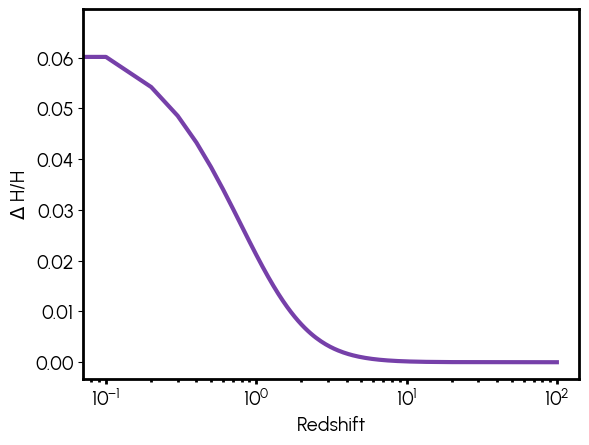

In [39]:
hPBH = resultPBH.x[0]
C = resultPBH.x[1]
Omega_mPBH = 0.14241/hPBH**2
print("h: ")
print(hPBH)
print("Omega_m: ")
print(Omega_mPBH)
print(" ")

#Here I apply a cubic spline interpolation, useful for plotting things below.
import scipy
#Note that np.flip is used becuase the interpolator will throw an error if you feed it a list of z-values that goes from large numbers to small ones. 
Interpolated_H_No_Mergers=scipy.interpolate.CubicSpline(np.flip(zList_No_Mergers), np.flip(HList_No_Mergers), axis=0, extrapolate=None)
Interpolated_H_PBH = SMBHFormationPBHs(hPBH, C)[3]

zList=np.linspace(0, 100, 1000) #REdshifts between 0 and 100, for plotting 
zList=np.flip(zList)
deltaH_H_PBH = (Interpolated_H_PBH(zList) - Interpolated_H_No_Mergers(zList))/Interpolated_H_No_Mergers(zList)

#Plotting fractional change in H 
plt.plot(zList, deltaH_H_PBH, color=cmap(1), linewidth = 3)
plt.xlabel("Redshift")
plt.ylabel(r'$\Delta$ H/H')
plt.xscale("log")
plt.show()


H0 With SMBH Formation From PBHs: 
71.79507512643433


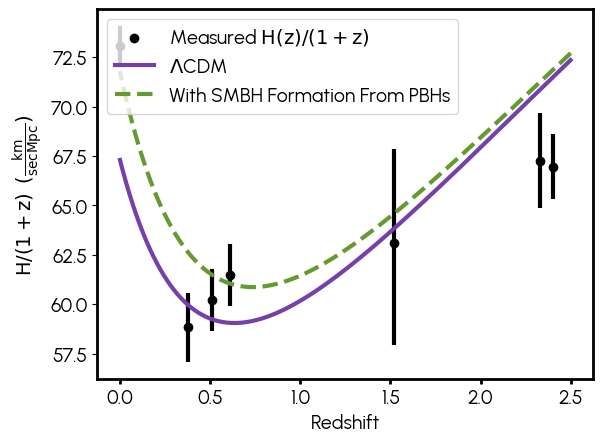

In [40]:
hPBH = resultPBH.x[0]
C = resultPBH.x[1]

Interpolated_H_PBH = SMBHFormationPBHs(hPBH, C)[3]

zList=np.linspace(0, 2.5, 1000) #Redshifts between 0 and 3, for plotting 
zList=np.flip(zList)

H1pzList_PBH = []
for index in range(len(zList)):
    z = zList[index]
    H1pzList_PBH.append(Interpolated_H_PBH(z)/(1+z))

plt.scatter(H_Measured_Redshift, H_Measured_1pz, color='k', label=r'Measured $\rm{H}(z)/(1+z)$')
plt.vlines(x = H_Measured_Redshift, ymin = H_Measured_1pz - H_Measured_Uncertainty_Lower_1pz, ymax = H_Measured_1pz + H_Measured_Uncertainty_Upper_1pz, colors = 'black', linewidth = 3)
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1], color = cmap(1), linewidth = 3, label=r'$Λ$CDM')
plt.plot(zList, H1pzList_PBH, color=cmap(6), linewidth = 3, linestyle ='dashed', label='With SMBH Formation From PBHs')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{H}/(1+z) \hspace{0.5} (\frac{km}{sec Mpc})$')
plt.legend()

H0PBH = SMBHFormationPBHs(hPBH, C)[1]
print("H0 With SMBH Formation From PBHs: ")
print(H0PBH)


In [41]:
hPBH = resultPBH.x[0]
C = resultPBH.x[1]
NumberDensitySMBHs = (SMBHFormationPBHs(hPBH, C)[4])*(MetersPerGpc**3) #Converting from units of per cubic meter to per cubic Gpc
print("Number Density of 10^7 Solar Mass SMBHs / 10^6, per cubic Gpc, at z = 0: ")
print(NumberDensitySMBHs/(10**6))
print(" ")
print("We would expect something like 10^6.")

Number Density of 10^7 Solar Mass SMBHs / 10^6, per cubic Gpc, at z = 0: 
0.9843849264889728
 
We would expect something like 10^6.


In [42]:
"""
Now I run things again, but here we have no conversion of matter to gravitational waves. Only h is varied in the fit. 
"""

from scipy.optimize import minimize
import scipy 

# Wrap ChiSqr to accept a single list of parameters
def ChiSqr_wrapped_PBH(params):
    h_sample, C = params
    return ChiSqrPBH(h_sample, C)

# Initial guesses for [h, C]
initial_guess = [hfitted, 0.0]

#Add bounds
bounds = [(0.5, 1), (0.0, 0.0)] #Forces C = 0, so no conversion of matter to radiation. 

# Run minimization
resultPBH_NoSMBHFormation = scipy.optimize.minimize(ChiSqr_wrapped_PBH, initial_guess, bounds=bounds)

# Print results
print("Best-Fit Parameters:")
print("h = ", resultPBH_NoSMBHFormation.x[0])
print("Minimum Chi-square: ", resultPBH_NoSMBHFormation.fun)

H0PBH_NoSMBHFormation = SMBHFormationPBHs(resultPBH_NoSMBHFormation.x[0], 0)[1]
print("H0 With No SMBH Formation From PBHs: ")
print(H0PBH_NoSMBHFormation)

Best-Fit Parameters:
h =  0.7185435527372466
Minimum Chi-square:  18.103406833529153
H0 With No SMBH Formation From PBHs: 
71.79498079812278


Here I show a comparison of 

A: H(z) when we allow SMBH formation to occur, but restrict the comoving formation rate so SMBHs are not overproduced

to

B: H(z) when we vary h to set initial conditions, but have no conversion of matter to gravitational waves. 

This serves to show that the conversion of matter to radiation here has a negligible effect on H(z), which jusitifies our approximation of using an unmodified CLASS package.

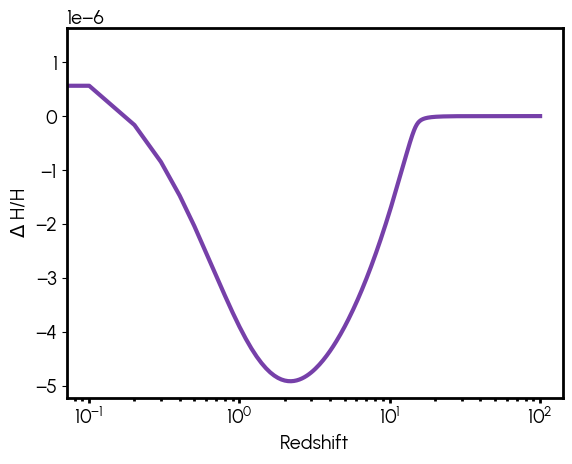

In [43]:
hPBH = resultPBH.x[0]
C = resultPBH.x[1]

hPBH_NoSMBHFormation = resultPBH_NoSMBHFormation.x[0]

Interpolated_H_No_SMBH_Formation = SMBHFormationPBHs(hPBH_NoSMBHFormation, 0)[3]
Interpolated_H_PBH = SMBHFormationPBHs(hPBH, C)[3]

zList=np.linspace(0, 100, 1000) #REdshifts between 0 and 100, for plotting 
zList=np.flip(zList)
deltaH_H_No_SMBH_Formation = (Interpolated_H_PBH(zList) - Interpolated_H_No_SMBH_Formation(zList))/Interpolated_H_No_SMBH_Formation(zList)

#Plotting fractional change in H  
plt.plot(zList, deltaH_H_No_SMBH_Formation, color=cmap(1), linewidth = 3)
plt.xlabel("Redshift")
plt.ylabel(r'$\Delta$ H/H')
plt.xscale("log")
plt.show()
